<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#INTRODUCTION" data-toc-modified-id="INTRODUCTION-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>INTRODUCTION</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Feature-Description" data-toc-modified-id="Feature-Description-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Feature Description</a></span></li><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Data-Set-Overview" data-toc-modified-id="Data-Set-Overview-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data Set Overview</a></span><ul class="toc-item"><li><span><a href="#Shape-of-the-Data" data-toc-modified-id="Shape-of-the-Data-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Shape of the Data</a></span></li><li><span><a href="#First-Few-Observations" data-toc-modified-id="First-Few-Observations-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>First Few Observations</a></span></li><li><span><a href="#Feature-Data-Types" data-toc-modified-id="Feature-Data-Types-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Feature Data Types</a></span></li></ul></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#plot_lang-column" data-toc-modified-id="plot_lang-column-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>plot_lang column</a></span></li><li><span><a href="#Categorical-Columns-Conversion" data-toc-modified-id="Categorical-Columns-Conversion-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Categorical Columns Conversion</a></span></li></ul></li><li><span><a href="#Number-of-Movies-per-Genre" data-toc-modified-id="Number-of-Movies-per-Genre-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Number of Movies per Genre</a></span></li><li><span><a href="#Number-of-Genres-per-Movie" data-toc-modified-id="Number-of-Genres-per-Movie-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Number of Genres per Movie</a></span></li></ul></li></ul></div>

# INTRODUCTION


## Overview
Classifying a text document into one or the other pre-defined classes (e.g., spam or not a spam) is an example of a standard Binary Classification problem. There are other scenarios where in one would need to classify the document into more than 2 classes. This is a multi-class classification problem where a data instance is associated with only one of the many single class labels, e.g., News Topic Classifier with the possible classes as 'Food', 'Sports', 'Politics' wherein each article can fall into only one of these classes. 

In this project, we will look into a scenario where each document can possibly assigned to more than one class, i.e., multi-label classification. The dataset comes from IMDB contains several informations about the movie. Here, we will use the plot of the movie and find out what are all the genres it falls under. 


## Feature Description
The data set contains just 1 column with the feature which describes the plot. The other columns corresponds to the possible 28 movie genres. These are basically our target columns. If the movie falls under a particular genre, then that particular column will indicate 1, else it will indicate 0


## Problem Statement 

The goal of this project is to predict all the possible genres of the movies based on its plot. 



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.8)

## Data Set Overview

**Load the data**

In [3]:
# Read the data
mydata = pd.read_csv('Data/movies_genres.csv', delimiter='\t')

### Shape of the Data

In [4]:
print('Shape of data: ', mydata.shape)

Shape of data:  (117194, 30)


The provided data consists of over 117k observations of movies along with 30 column variables. Let us take a look into what each column looks like. 

### First Few Observations

In [5]:
mydata.head(2)

,title,plot,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,plot_lang
0,"""#7DaysLater"" (2013)",#7dayslater is an interactive comedy series f...,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,en
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}","With just one week left in the workshops, the...",0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,en


In [6]:
mydata.loc[1, 'title'], mydata.loc[1, 'plot']

('"#BlackLove" (2015) {Crash the Party (#1.9)}',
 ' With just one week left in the workshops, the women consider the idea of "The One." The ladies are stunned when Jahmil finally comes to a decision about Bentley and if he\'s the one for her. Jack challenges Tennesha to express her feelings of love towards Errol, but can she put herself out there and face possible rejection?')

Each observation consists of 
* A title which contains the title, the year and any tag if presetn
* Plot containing the plot of the movie
* 27 Movie Genres
* Plot Language

### Feature Data Types

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117194 entries, 0 to 117193
Data columns (total 30 columns):
title          117194 non-null object
plot           117194 non-null object
Action         117194 non-null int64
Adult          117194 non-null int64
Adventure      117194 non-null int64
Animation      117194 non-null int64
Biography      117194 non-null int64
Comedy         117194 non-null int64
Crime          117194 non-null int64
Documentary    117194 non-null int64
Drama          117194 non-null int64
Family         117194 non-null int64
Fantasy        117194 non-null int64
Game-Show      117194 non-null int64
History        117194 non-null int64
Horror         117194 non-null int64
Music          117194 non-null int64
Musical        117194 non-null int64
Mystery        117194 non-null int64
News           117194 non-null int64
Reality-TV     117194 non-null int64
Romance        117194 non-null int64
Sci-Fi         117194 non-null int64
Short          117194 non-null int64

* There are no missing values
* All the Movie Genre columns have int data type. They have to be converted to categories.

# EDA

## Feature Engineering

### plot_lang column

In [8]:
mydata.plot_lang.describe()

count     117194
unique         1
top           en
freq      117194
Name: plot_lang, dtype: object

From the above, we see that all the movies provided have plots in english language. Hence, let us drop this column

In [9]:
mydata = mydata.drop('plot_lang', axis=1)

### Categorical Columns Conversion

In [10]:
category_columns = mydata.columns.drop(['title', 'plot'])
for col in category_columns:
    mydata[col] = mydata[col].astype('category')

## Number of Movies per Genre

In [17]:
sum_genre = mydata[category_columns].sum()
df_movies_per_genre = pd.DataFrame({'Genre':category_columns, 'Total': sum_genre})

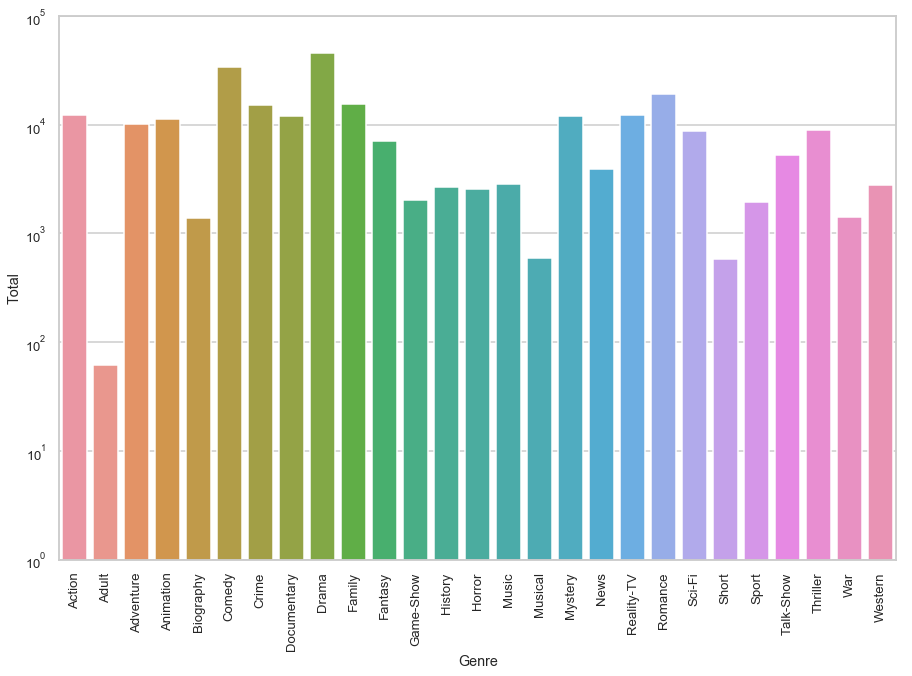

In [55]:
f, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.barplot(data=df_movies_per_genre, x='Genre', y='Total', axes=ax)
ax.set(yscale='log', ylim=(1, 1e5))
plt.xticks(rotation=90)
plt.show()

In [23]:
print('Number of Adult Movies: ', df_movies_per_genre.loc['Adult', 'Total'])

Number of Adult Movies:  61.0


## Number of Genres per Movie

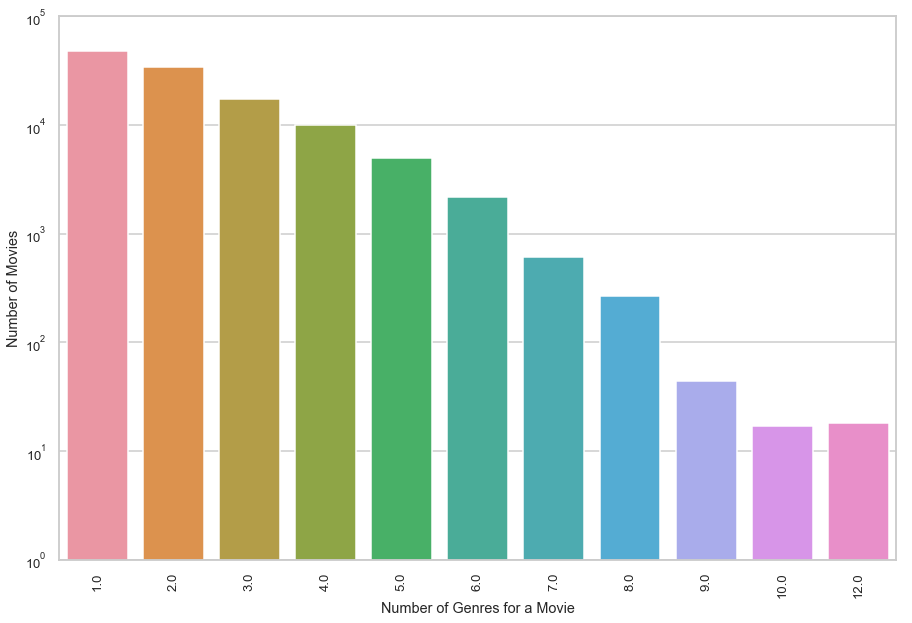

In [57]:
sum_movie = mydata[category_columns].sum(axis=1)
df_genres_per_movie = pd.DataFrame({'title': mydata.title, 'num_genres':sum_movie}).groupby('num_genres').count()
f, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.barplot(data=df_genres_per_movie, x=df_genres_per_movie.index, y='title', axes=ax)
ax.set(yscale='log', ylim=(1, 1e5), xlabel='Number of Genres for a Movie', ylabel='Number of Movies')
plt.xticks(rotation=90)
plt.show()